In [19]:
import cv2
import os
import matplotlib.pyplot as plt
from time import time,sleep

from googleapiclient.discovery import build
from google.oauth2 import service_account
from googleapiclient.http import MediaIoBaseUpload
import io

In [20]:
input_video_path = "C://Users//Acer//Desktop//siam project//00000003034000000.mp4"
output_dir = "output_frames"
os.makedirs(output_dir, exist_ok=True)
cap = cv2.VideoCapture(input_video_path)

In [21]:
frame_to_capture = list(range(0,500,1))# Get framerate
Fps = int(cap.get(cv2.CAP_PROP_FPS))                   # Frame/sec     25 frame/sec
# All frame of video
Afm = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))       # video length 343 sec
# length of video
duration = Afm//Fps
# print(f"{duration} sec")
# Frame capture every x min
# Cap_every_x_min = 0.5
Cap_every_x_min = 1
Fxmin = (Fps*60)*Cap_every_x_min


print(f"Frame rate: {Fps}")
print(f"Total frames: {Afm}")
print(f"Video duration: {duration:.2f} seconds or {duration/(Fps*2)} min")
print(f"Frames to capture every {Cap_every_x_min} minutes: {Fxmin} frame")
print(f"We're going to capture every {Fxmin} frames, which means every {Cap_every_x_min} minutes we save 1 image.")
print(f"We're gonno got {Afm//Fxmin}")
frame_to_capture

Frame rate: 24
Total frames: 150536
Video duration: 6272.00 seconds or 130.66666666666666 min
Frames to capture every 1 minutes: 1440 frame
We're going to capture every 1440 frames, which means every 1 minutes we save 1 image.
We're gonno got 104


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [22]:
frame_count = 0
stop_count = 100
while cap.isOpened():
    ret, frame = cap.read()
    # ถ้าเกิดว่า video หมดก็จบ
    if not ret or stop_count == 10:
        break

    # เอาวิดีโอทุกๆ กี่วิ?
    if frame_count % Fxmin == 0:
        print("frame_count:",frame_count)
        # plt.imshow(frame)
        # plt.show()
        output_path = os.path.join(output_dir, f'frame_{frame_count}.jpg')
        cv2.imwrite(output_path,frame)
        stop_count = stop_count+1

    frame_count = frame_count + 1
    

frame_count: 0
frame_count: 1440
frame_count: 2880


KeyboardInterrupt: 

<hr>

True


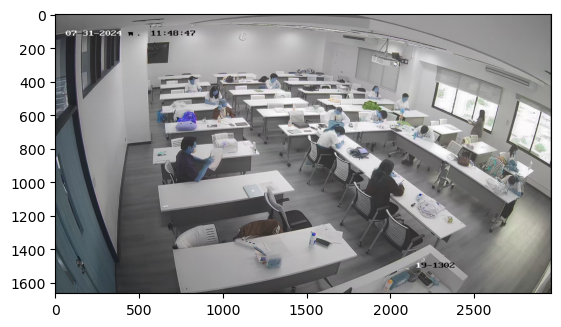

True


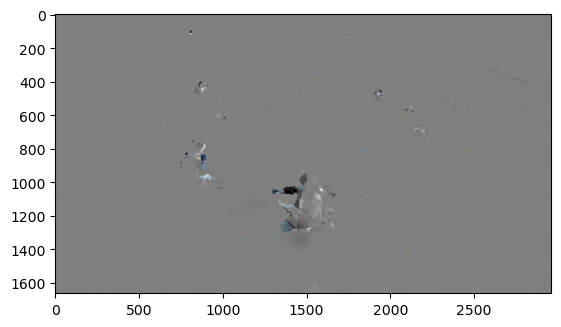

True


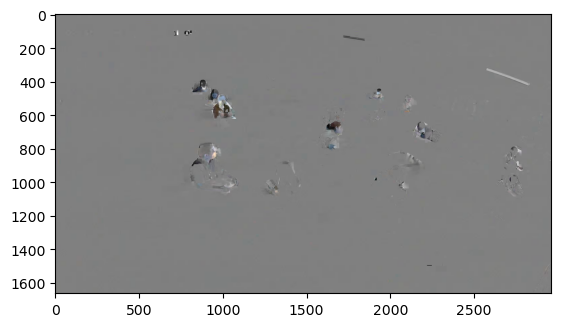

In [24]:
frame_to_capture = [0,1440,2880]
for frame_no in frame_to_capture:
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
    sleep(0.1)
    ret, frame = cap.read()
    print(ret)
    plt.imshow(frame)
    plt.show()

In [25]:
# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

In [26]:
# Get frame rate and frame count
Fps = cap.get(cv2.CAP_PROP_FPS)  # Frame rate (frames per second)
Afm = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Total number of frames

In [27]:
# Duration of video in seconds
duration = Afm / Fps
print(f"The length of the video is {duration:.2f} seconds.")

# Frames to capture every x minutes
Cap_every_x_min = 1  # Capture every 1 minute
Fxmin = int(Fps * 60 * Cap_every_x_min)  # Frames to capture every x minutes

print(f"Frame rate: {Fps}")
print(f"Total frames: {Afm}")
print(f"Video duration: {duration:.2f} seconds")
print(f"Frames to capture every {Cap_every_x_min} minute(s): {Fxmin} frames")

The length of the video is 6272.33 seconds.
Frame rate: 24.0
Total frames: 150536
Video duration: 6272.33 seconds
Frames to capture every 1 minute(s): 1440 frames


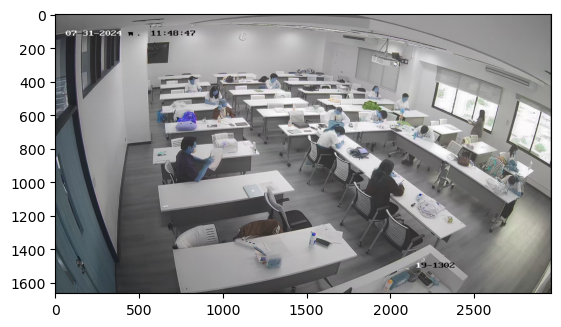

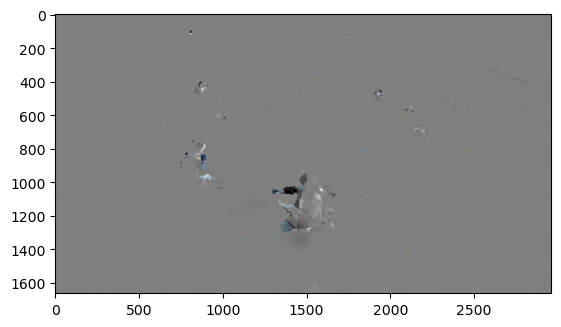

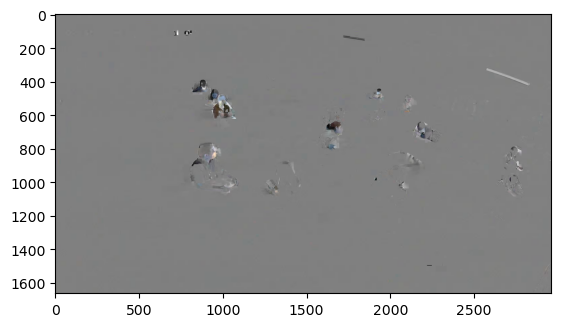

In [33]:
frames_to_capture = [0, 1440, 2880]
for frame_no in frames_to_capture:
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
    ret, frame = cap.read()
    
    if not ret:
        print(f"Failed to capture frame at {frame_no}")
        continue
    
    # Display the frame
    plt.imshow(frame)  # Convert BGR to RGB for correct display
    plt.show()

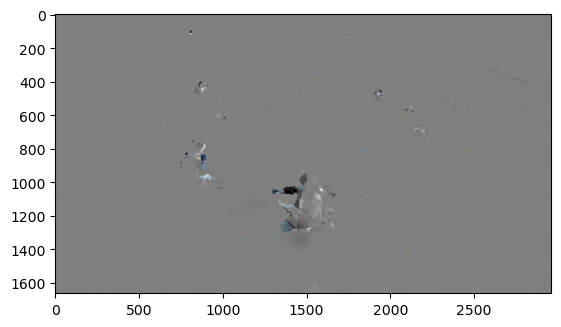

In [43]:
input_video_path = "C://Users//Acer//Desktop//siam project//00000003034000000.mp4"
cap = cv2.VideoCapture(input_video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, 1440)
ret, frame = cap.read()
plt.imshow(frame)

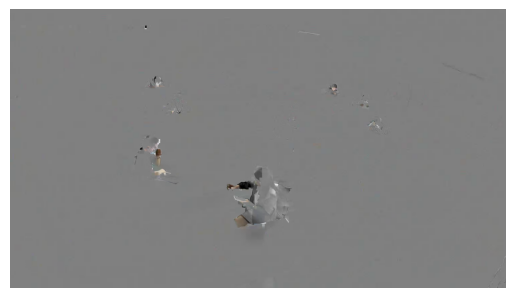

In [44]:
import cv2
import matplotlib.pyplot as plt

input_video_path = "C://Users//Acer//Desktop//siam project//00000003034000000.mp4"
cap = cv2.VideoCapture(input_video_path)

# Check if the video file opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Set the frame position to the desired frame number
    cap.set(cv2.CAP_PROP_POS_FRAMES, 1440)
    
    # Read the frame
    ret, frame = cap.read()
    
    # Check if the frame was read correctly
    if not ret:
        print("Error: Could not read frame 1440.")
    else:
        # Convert the frame to RGB format for displaying with matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display the frame using matplotlib
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.show()
    
    # Release the video capture object
    cap.release()
